In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = pd.read_csv('Temp and CO2.csv')
data = data.iloc[:, :3]
data = data.dropna()
data

,Year,PPM,Degrees C
0,1959.0,315.98,0.06
1,1960.0,316.91,0.03
2,1961.0,317.64,-0.03
3,1962.0,318.45,0.06
4,1963.0,318.99,0.03
...,...,...,...
58,2017.0,406.76,1.01
59,2018.0,408.72,0.92
60,2019.0,411.66,0.84
61,2020.0,414.24,0.97


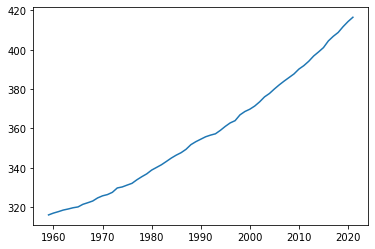

In [6]:
X = data['Year'].values
y = data['PPM'].values
X = X.reshape(-1, 1)
plt.plot(X, y)

In [8]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

PolynomialFeatures()

In [9]:
linreg = LinearRegression()
linreg.fit(X_poly, y)

y_pred = linreg.predict(X_poly)

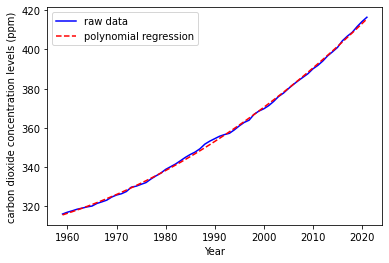

In [33]:
plt.plot(X, y, c='blue', label='raw data')
plt.plot(X, y_pred, c='red', label='polynomial regression', ls='--')
plt.xlabel('Year')
plt.ylabel('carbon dioxide concentration levels (ppm)')
plt.legend()

In [19]:
print(linreg.coef_)
print(linreg.intercept_)

[ 0.00000000e+00 -5.02757537e+01  1.30376356e-02]
48771.436440064484


In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(data['PPM'], y_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.720
